# Does Online Courses Attract Students?

## Background and Objective

You are working as a data scientist at a local University. The university started offering online courses to reach a wider range of students. The university wants you to help them understand enrollment trends. They would like you to identify what contributes to higher enrollment. In particular, whether the course type (online or classroom) is a factor.
## Data Preprocessing

We import and clean the data. Specifically, for every column in the data, we do the following:
1. Check the values whether they match the description given in the table above.
2. Check number of missing values in the column.
First, we observe the dataset. We import `pandas` as `pd` and use the `read_csv` method to import the dataset using the link provided. Then, we use the `head` method to observe the first few rows of the dataframe.

In [1]:
# Import pandas as pd
import pandas as pd

# Import CSV file 
df = pd.read_csv('https://s3.amazonaws.com/talent-assets.datacamp.com/university_enrollment_2306.csv')

# Observe some observations of df
df.head()

,course_id,course_type,year,enrollment_count,pre_score,post_score,pre_requirement,department
0,1,classroom,2018,165,28.14,73.0,Beginner,Science
1,2,classroom,2020,175,79.68,86.0,None,Science
2,3,online,2016,257,57.24,80.0,NaN,Mathematics
3,4,online,2013,251,97.67,75.0,Beginner,Technology
4,5,classroom,2019,165,39.75,76.0,Beginner,Science


We investigate the data type of the values in each column. We see that the `pre_score` is not continuous and has `object` data type. First, we use `fillna` method filling in null values with appropriate values. Only the `post_score` and `pre_requirement` columns have missing values. Also, observe that some rows in `pre_score` has a non-null value of `'-'`. Hence, we treat it as a null value and replace with a value of `0`. Finally, we convert the column's data type to `float` using the `astype` method. As a supplement, we observed that there are `'Math'` and `'Mathematics'` values in the department column. We choose the `'Mathematics'` for all rows with the `'Math'` value.

In [5]:
# Inspect data types and null values
df.info()

# Count missing values
print(df.isna().sum())

# Fill missing values
values = {"course_type": 'classroom', "year": 2011, "enrollment_count": 0, "pre_score": '0', "post_score": 0, "pre_requirement": 'None', "department": 'unknown'}
df = df.fillna(value = values)

# Inspect data types and null values
df['pre_score'] = df['pre_score'].replace('-', '0')
df['pre_score'] = df['pre_score'].astype(float)

# Inspect data types and null values
df.info()

# Count missing values
print(df.isna().sum())

# Clean department column: 'Math' and 'Mathematics'
df['department'] = df['department'].str.strip().replace('Math', 'Mathematics')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1850 entries, 0 to 1849
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   course_id         1850 non-null   int64  
 1   course_type       1850 non-null   object 
 2   year              1850 non-null   int64  
 3   enrollment_count  1850 non-null   int64  
 4   pre_score         1850 non-null   float64
 5   post_score        1850 non-null   float64
 6   pre_requirement   1850 non-null   object 
 7   department        1850 non-null   object 
dtypes: float64(2), int64(3), object(3)
memory usage: 115.8+ KB
course_id           0
course_type         0
year                0
enrollment_count    0
pre_score           0
post_score          0
pre_requirement     0
department          0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1850 entries, 0 to 1849
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------       

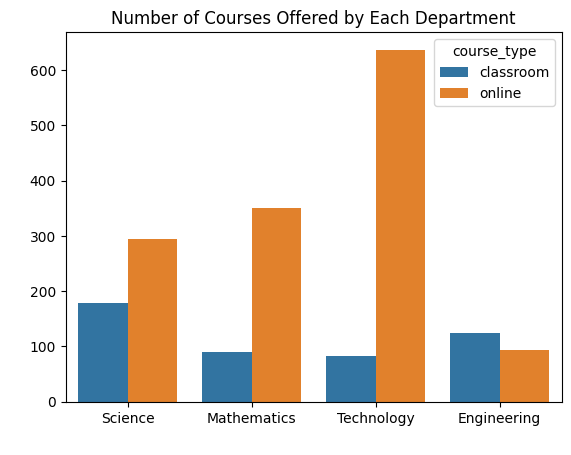

In [22]:
# Import visualization packages
import seaborn as sns
import matplotlib.pyplot as plt

# Countplot of the Courses Offered by Each Department
sns.countplot(data = df, x = 'department', hue = 'course_type').set(title = 'Number of Courses Offered by Each Department', xlabel = " ", ylabel = " ")
plt.savefig('enrollment_bar.png')
plt.show()

## Task 2
We observe the distribution of the enrollment counts feature using the following visualization. For the plot, we shall use the Seaborn library. Notice that more than 250 enrollees are usually present. Moreover, the number of enrollees are either less than 200 or greater than 220. Lastly, the enrollment counts are not normally distributed.

     ---------------------------------------- 0.0/293.3 kB ? eta -:--:--
     ------------------------------------- 293.3/293.3 kB 17.7 MB/s eta 0:00:00


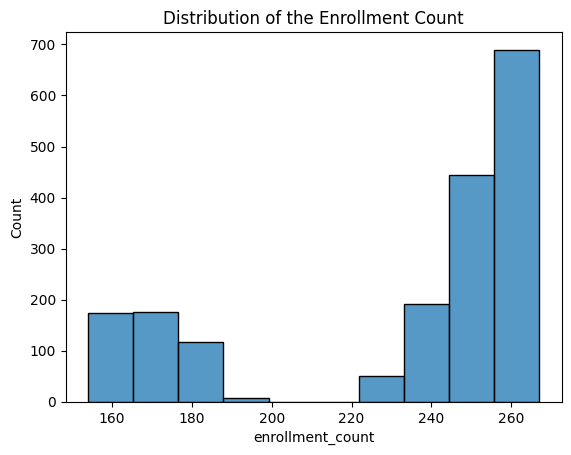

<Figure size 640x480 with 0 Axes>

In [5]:
# Histogram
sns.histplot(data = df, x = 'enrollment_count', bins = 10).set(title = 'Distribution of the Enrollment Count')

# Show plot
plt.show()
plt.savefig('hist_enrol.png')

## Task 3
First, we check if each `course_id` is unique. The number of unique ID is the same as the number of rows. Hence, no duplicate IDs are recorded in the dataset. To visualize the balance of course types, we create a countplot using Seaborn. From the plot, online courses are more offered than classroom course type. As the difference is about 900 courses, we see a class imbalance across the course types.

1850
online       1375
classroom     475
Name: course_type, dtype: int64


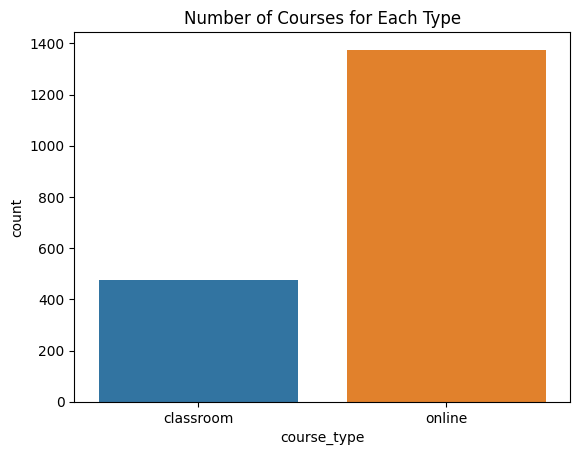

<Figure size 640x480 with 0 Axes>

In [6]:
# Check number of unique course_id
print(len(df['course_id'].unique()))

# Count the number of courses of each type
print(df['course_type'].value_counts())

## Task 4
Students tend to enroll more in online courses than in classroom-taught courses. Consider the boxplot, created using Seaborn, showing the enrollment counts across the course types. The range and the median of enrollment counts for online courses are farther and greater than that of the classroom-taught courses.

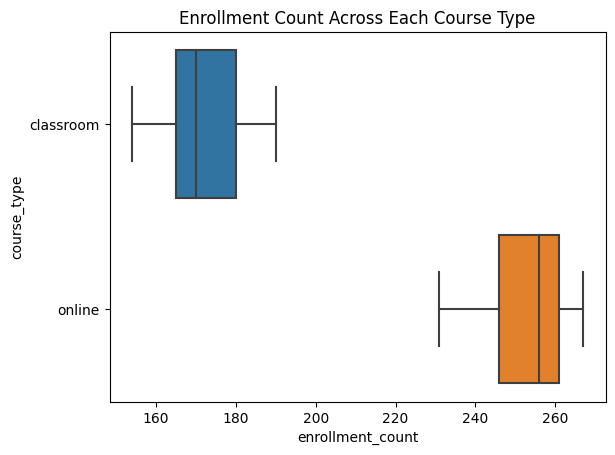

<Figure size 640x480 with 0 Axes>

In [7]:
# Boxplot
sns.boxplot(data = df, y = 'course_type', x = 'enrollment_count').set(title = 'Enrollment Count Across Each Course Type')

# Show plot
plt.show()
plt.savefig('box_enrol.png')

In [32]:
from scipy.stats import mannwhitneyu

df_count = df['enrollment_count']
df_count_online = df_count[df['course_type'] == 'online']
df_count_room = df_count[df['course_type'] == 'classroom']

_, p = mannwhitneyu(df_count_online, df_count_room)

print(p)

1.2077024849206609e-236


## Task 5
The university wants to predict how many students will enroll in a course. This is a regression type of machine learning. The target variable is the enrollment count.

## Task 6
For a baseline model, we shall implement a simple Linear Regression model using the scikit-learn library.

In [33]:
# Import necessary packages
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# One hot encoding for categorical values
df_dummy = pd.get_dummies(df, drop_first = True)

# Create linear regression model
model = LinearRegression()

# Dependent and independent variables (and values)
X = df_dummy.drop(['enrollment_count'], axis = 1).values
y = df_dummy['enrollment_count'].values

# Split into training and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit to model
model.fit(X_train, y_train)

LinearRegression()

## Task 7
For a comparison model, we shall implement an Elastic Net model using the scikit-learn library. We choose the hyperparameter `alpha` to be equal to `0.0001`.

In [142]:
# Import necessary packages
from sklearn.linear_model import ElasticNet

# Create elastic net model
comp_model = ElasticNet(alpha = 0.0001)

# Fit to model
comp_model.fit(X_train, y_train)

ElasticNet(alpha=0.0001)

## Task 8
Linear regression provides a linear estimate of the relationship between the independent and the dependent variables. Due to its simplicity and efficiency in computing, we considered it as a baseline model. Moreover, the model is robust to overfitting. The loss function for the linear regression model is the ordinary least squares. In elastic net models, a loss function that puts more weight on errors is utilized. Although more complex and requires more tuning, an elastic net model is less prone to overfitting and able to select important features and handle correlated features.

## Task 9
We compare the root mean squared errors (RMSE) of the two models.

In [143]:
# Import necessary packages 
from sklearn.metrics import mean_squared_error as MSE

# Predictions
y_pred = model.predict(X_test) # Baseline
y_pred_comp = comp_model.predict(X_test) # Comparison

# Compute RMSE
rmse = MSE(y_test, y_pred, squared=False) ** 0.5
rmse_comp = MSE(y_test, y_pred_comp, squared=False) ** 0.5

# Print errors
print(f'The Root Mean Squared Error for the Baseline Model is {rmse}')
print(f'The Root Mean Squared Error for the Comparison Model is {rmse_comp}')

The Root Mean Squared Error for the Baseline Model is 0.561153419986678
The Root Mean Squared Error for the Comparison Model is 0.5600931357111498


## Task 10
The RMSE scores are equal up to the second decimal place. Thus, we conclude that the two models perform equally the same.

In [36]:
# Import AutoML packages
from tpot import TPOTRegressor

# Find model
tpot = TPOTRegressor(generations=100, population_size=100, cv = 10, verbosity=2, random_state=42)
tpot.fit(X_train, y_train)
print(tpot.score(X_test, y_test))
tpot.export('enrollment_pipeline.py')

                                                                                                                       
Generation 1 - Current best internal CV score: -0.10960888510177771
                                                                                                                       
Generation 2 - Current best internal CV score: -0.10955987682026971
                                                                                                                       
Generation 3 - Current best internal CV score: -0.10955987682026971
                                                                                                                       
Generation 4 - Current best internal CV score: -0.10955987682026971
                                                                                                                       
Generation 5 - Current best internal CV score: -0.10955987682026971
                                                            